In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [4]:
dataset, dataset_info = tfds.load('malaria',with_info = True, as_supervised = True, shuffle_files = True, split = ['train'])

In [5]:
for data in dataset[0].take(4):
  print(data)

(<tf.Tensor: shape=(145, 148, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(151, 115, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [25]:
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# dataset = tf.data.Dataset.range(10)
# print(dataset.as_numpy_iterator())
# dataset_size = len(dataset)

# train_dataset = dataset.take(int(train_ratio * dataset_size))
# print(list(train_dataset.as_numpy_iterator()))

# val_test_dataset = dataset.skip(int(train_ratio * dataset_size))
# val_dataset = val_test_dataset.take(int(val_ratio*dataset_size))
# print(list(val_dataset.as_numpy_iterator()))

# test_dataset = val_test_dataset.skip(int(val_ratio * dataset_size))
# test_dataset = test_dataset.take(int(test_ratio*dataset_size))
# print(list(test_dataset.as_numpy_iterator()))

In [26]:
def splits(dataset, train_ratio, val_ratio,test_ratio):

  dataset_size = len(dataset)

  train_dataset = dataset.take(int(train_ratio * dataset_size))
  print(list(train_dataset.as_numpy_iterator()))

  val_test_dataset = dataset.skip(int(train_ratio * dataset_size))
  val_dataset = val_test_dataset.take(int(val_ratio*dataset_size))
  print(list(val_dataset.as_numpy_iterator()))

  test_dataset = val_test_dataset.skip(int(val_ratio * dataset_size))
  test_dataset = test_dataset.take(int(test_ratio*dataset_size))
  print(list(test_dataset.as_numpy_iterator()))

  return train_dataset, val_dataset, test_dataset

In [27]:
train_dataset, val_dataset, test_dataset = splits(dataset[0],train_ratio = 0.6, val_ratio = 0.2, test_ratio = 0.2)

Streaming output truncated to the last 5000 lines.

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0), (array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),

# Data Visualization

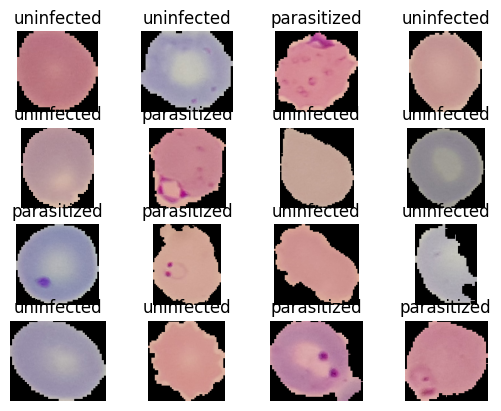

In [28]:
for i , (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

In [ ]:
dataset_info.features['label'].int2str(1)

'uninfected'

# Data Processing

In [29]:
IM_SIZE = 224
def resizing_rescale(image,label):
  return tf.image.resize(image,(IM_SIZE, IM_SIZE))/255.0, label

In [30]:
train_dataset = train_dataset.map(resizing_rescale)

In [31]:
val_dataset = val_dataset.map(resizing_rescale)
test_dataset = test_dataset.map(resizing_rescale)

In [32]:
for image,label in train_dataset.take(1):
  print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [33]:
Batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(Batch_size).prefetch(tf.data.AUTOTUNE)

In [34]:
Batch_size = 32
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(Batch_size).prefetch(tf.data.AUTOTUNE)

In [35]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

# Model Creation

In [46]:
lenet_model = tf.keras.Sequential([
    InputLayer(input_shape = (IM_SIZE,IM_SIZE,3)),
    Conv2D(filters =6, kernel_size=3, strides = (1,1), padding = 'valid',activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Conv2D(filters =16, kernel_size=3, strides = (1,1), padding = 'valid',activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Flatten(),

    Dense(100,activation = 'relu'),
    BatchNormalization(),

    Dense(10,activation = 'relu'),
    BatchNormalization(),
    Dense(1,activation = 'sigmoid'),
])

lenet_model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 222, 222, 6)         │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 222, 222, 6)         │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 111, 111, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 109, 109, 16)        │             880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 109, 109, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 46656)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 100)                 │       4,665,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

In [51]:
lenet_model.compile(optimizer = Adam(learning_rate = 0.01),
              loss = BinaryCrossentropy(),
              metrics = ['accuracy'])

In [52]:
history = lenet_model.fit(train_dataset, validation_data= val_dataset,epochs =100, verbose = 1)

Epoch 1/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.9367 - loss: 0.2067 - val_accuracy: 0.9033 - val_loss: 0.4021
Epoch 2/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 74s 72ms/step - accuracy: 0.9429 - loss: 0.1868 - val_accuracy: 0.9443 - val_loss: 0.2035
Epoch 3/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 38s 73ms/step - accuracy: 0.9442 - loss: 0.1722 - val_accuracy: 0.9203 - val_loss: 0.2823
Epoch 4/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.9437 - loss: 0.1730 - val_accuracy: 0.9372 - val_loss: 0.2015
Epoch 5/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 42s 81ms/step - accuracy: 0.9469 - loss: 0.1634 - val_accuracy: 0.9336 - val_loss: 0.2415
Epoch 6/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 38s 73ms/step - accuracy: 0.9499 - loss: 0.1557 - val_accuracy: 0.9336 - val_loss: 0.2653
Epoch 7/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 37s 71ms/step - accuracy: 0.9514 - loss: 0.1498 - val_accuracy: 0.9312 - val_loss: 0.3254
Epoch 8/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 37s 72ms/step - accuracy: 0.9524 - loss: 0

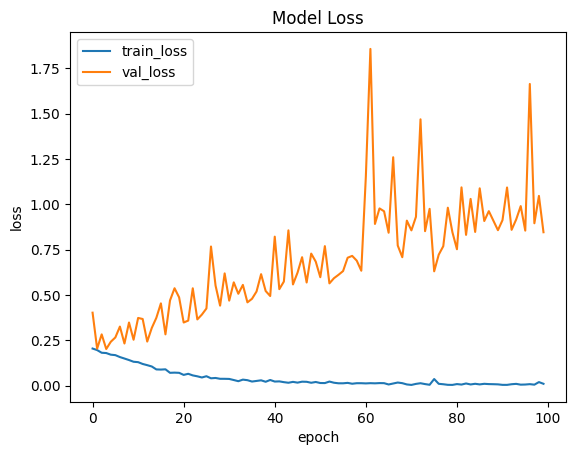

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

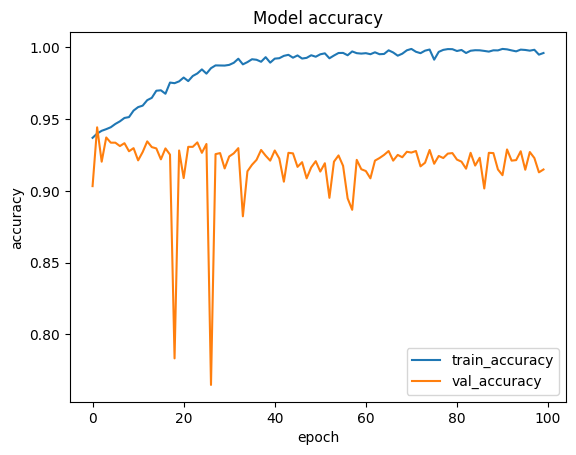

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

# Model Evaluation

In [61]:
test_dataset = test_dataset.batch(1)

In [62]:
lenet_model.evaluate(test_dataset)

5511/5511 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.9168 - loss: 0.8764


[0.8052621483802795, 0.9148975014686584]

In [66]:
parasite(lenet_model.predict(test_dataset.take(1))[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step


'U'

In [65]:
def parasite(x):
  if x<0.5:
    return str('P')
  else:
    return str('U')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


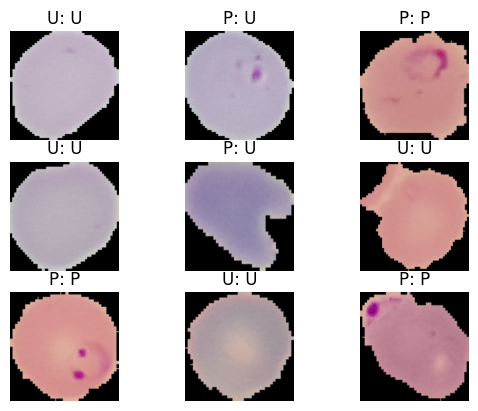

In [69]:
for i, (image, label) in enumerate(test_dataset.take(9)):

  ax = plt.subplot(3,3, i+1)
  plt.imshow(image[0])
  plt.title(str(parasite(label.numpy()[0])) + ": " + str(parasite(lenet_model.predict(image)[0][0])))

  plt.axis("off")